# 🩺 Chronic Kidney Disease Classification using Supervised Machine Learning

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/RansiluRanasinghe/CKD-Classification-ML/blob/main/notebook.ipynb)

---

## 📌 Notebook Introduction

This Google Colab notebook demonstrates an **end-to-end supervised machine learning pipeline** for predicting **Chronic Kidney Disease (CKD)** using clinical and laboratory data.

The notebook focuses on the practical application of machine learning concepts, including:

1. ✅ **Data understanding and cleaning**
2. ✅ **Handling missing and inconsistent medical data**
3. ✅ **Feature preprocessing and scaling**
4. ✅ **Dimensionality reduction** using Principal Component Analysis (PCA)
5. ✅ **Training and evaluating** a supervised classification model

---

## 🎯 Key Focus: PCA with and without Scaling

Special attention is given to **PCA behavior with and without feature scaling**, highlighting its importance when working with medical features that have different units and ranges.

This comparison demonstrates:
- How scaling affects principal component variance
- Why standardization is critical for medical data
- The impact of feature magnitude on dimensionality reduction

---

## 💡 Notebook Objectives

The objective of this notebook is not only to achieve **reliable prediction performance**, but also to demonstrate:

- 📊 A **clear, explainable** ML workflow
- 🔄 **Reproducible** methodology
- 🎓 Alignment with **academic coursework** requirements
- 🏥 Understanding of **real-world medical data** constraints


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
np.random.seed(42)

####Loading the dataset

In [3]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("mansoordaku/ckdisease")

print("Path to dataset files:", path)

Using Colab cache for faster access to the 'ckdisease' dataset.
Path to dataset files: /kaggle/input/ckdisease


In [4]:
import os

dataset_path = "/kaggle/input/ckdisease"

os.listdir(dataset_path)

['kidney_disease.csv']

In [5]:
dataset = os.path.join(dataset_path, "kidney_disease.csv")

df = pd.read_csv(dataset)

display(df.head(10))

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35,7300,4.6,no,no,no,good,no,no,ckd
5,5,60.0,90.0,1.015,3.0,0.0,NaN,NaN,notpresent,notpresent,...,39,7800,4.4,yes,yes,no,good,yes,no,ckd
6,6,68.0,70.0,1.010,0.0,0.0,NaN,normal,notpresent,notpresent,...,36,NaN,NaN,no,no,no,good,no,no,ckd
7,7,24.0,NaN,1.015,2.0,4.0,normal,abnormal,notpresent,notpresent,...,44,6900,5,no,yes,no,good,yes,no,ckd
8,8,52.0,100.0,1.015,3.0,0.0,normal,abnormal,present,notpresent,...,33,9600,4.0,yes,yes,no,good,no,yes,ckd
9,9,53.0,90.0,1.020,2.0,0.0,abnormal,abnormal,present,notpresent,...,29,12100,3.7,yes,yes,no,poor,no,yes,ckd


####Dataset Analysis

In [6]:
print("Dataset shape: ", df.shape)
print("Columns: ", df.columns.tolist())

Dataset shape:  (400, 26)
Columns:  ['id', 'age', 'bp', 'sg', 'al', 'su', 'rbc', 'pc', 'pcc', 'ba', 'bgr', 'bu', 'sc', 'sod', 'pot', 'hemo', 'pcv', 'wc', 'rc', 'htn', 'dm', 'cad', 'appet', 'pe', 'ane', 'classification']


In [7]:
print("Data types: \n", df.dtypes)

Data types: 
 id                  int64
age               float64
bp                float64
sg                float64
al                float64
su                float64
rbc                object
pc                 object
pcc                object
ba                 object
bgr               float64
bu                float64
sc                float64
sod               float64
pot               float64
hemo              float64
pcv                object
wc                 object
rc                 object
htn                object
dm                 object
cad                object
appet              object
pe                 object
ane                object
classification     object
dtype: object


In [8]:
missing_vals = df.isnull().sum()
print("Missing values: \n", missing_vals[missing_vals > 0])

Missing values: 
 age        9
bp        12
sg        47
al        46
su        49
rbc      152
pc        65
pcc        4
ba         4
bgr       44
bu        19
sc        17
sod       87
pot       88
hemo      52
pcv       70
wc       105
rc       130
htn        2
dm         2
cad        2
appet      1
pe         1
ane        1
dtype: int64


/tmp/ipython-input-1417296112.py:11: UserWarning: Glyph 9 (	) missing from font(s) DejaVu Sans.
  plt.savefig("class distribution.png")
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 9 (	) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


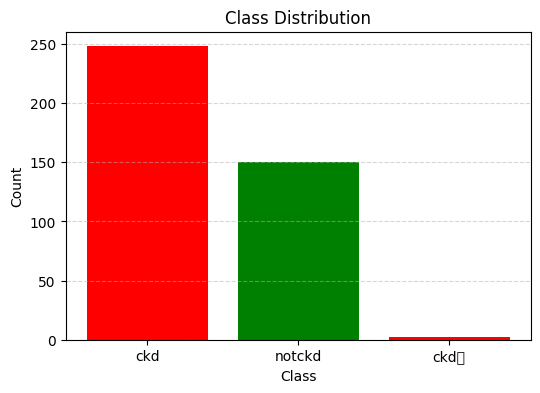

In [11]:
import matplotlib.pyplot as plt

counts = df['classification'].value_counts()

plt.figure(figsize=(6,4))
plt.bar(counts.index, counts.values, color=['red', 'green'])
plt.xlabel('Class')
plt.ylabel('Count')
plt.title('Class Distribution')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.savefig("class distribution.png")
plt.show()

In [10]:
target_column = df.columns[-1]
print("Target column: ", target_column)
print(df[target_column].value_counts())

print("\n Class Distibution :\n", df[target_column].value_counts(normalize=True) * 100)

Target column:  classification
classification
ckd       248
notckd    150
ckd\t       2
Name: count, dtype: int64

 Class Distibution :
 classification
ckd       62.0
notckd    37.5
ckd\t      0.5
Name: proportion, dtype: float64


####Data Cleaning

In [14]:
from enum import unique
print("Invalid symbols checkup:\n")

for col in df.columns:
  if df[col].dtype == "object":
    unique_values = df[col].unique()[:20]
    print(f"{col}: {unique_values}")

    if "?" in df[col].values or any("?" in str(x) for x in df[col].dropna().values):
      print("found ? in", col)

Invalid symbols checkup:

rbc: [nan 'normal' 'abnormal']
pc: ['normal' 'abnormal' nan]
pcc: ['notpresent' 'present' nan]
ba: ['notpresent' 'present' nan]
pcv: ['44' '38' '31' '32' '35' '39' '36' '33' '29' '28' nan '16' '24' '37' '30'
 '34' '40' '45' '27' '48']
found ? in pcv
wc: ['7800' '6000' '7500' '6700' '7300' nan '6900' '9600' '12100' '4500'
 '12200' '11000' '3800' '11400' '5300' '9200' '6200' '8300' '8400' '10300']
found ? in wc
rc: ['5.2' nan '3.9' '4.6' '4.4' '5' '4.0' '3.7' '3.8' '3.4' '2.6' '2.8' '4.3'
 '3.2' '3.6' '4' '4.1' '4.9' '2.5' '4.2']
found ? in rc
htn: ['yes' 'no' nan]
dm: ['yes' 'no' ' yes' '\tno' '\tyes' nan]
cad: ['no' 'yes' '\tno' nan]
appet: ['good' 'poor' nan]
pe: ['no' 'yes' nan]
ane: ['no' 'yes' nan]
classification: ['ckd' 'ckd\t' 'notckd']


In [13]:
df = df.replace("?", np.nan)

In [18]:
for col in df.columns:
  if col != target_column:
    try:
      df[col] = pd.to_numeric(df[col])
      print("Coverted to numeric: ", col)
    except ValueError:
      pass

print("\nData types after covertion: \n", df.dtypes)

Coverted to numeric:  id
Coverted to numeric:  age
Coverted to numeric:  bp
Coverted to numeric:  sg
Coverted to numeric:  al
Coverted to numeric:  su
Coverted to numeric:  bgr
Coverted to numeric:  bu
Coverted to numeric:  sc
Coverted to numeric:  sod
Coverted to numeric:  pot
Coverted to numeric:  hemo

Data types after covertion: 
 id                  int64
age               float64
bp                float64
sg                float64
al                float64
su                float64
rbc                object
pc                 object
pcc                object
ba                 object
bgr               float64
bu                float64
sc                float64
sod               float64
pot               float64
hemo              float64
pcv                object
wc                 object
rc                 object
htn                object
dm                 object
cad                object
appet              object
pe                 object
ane                object
classificatio

####Addressing Missing Values

In [22]:
print("Before handeling missing values: \n")

print("Total missing values: ", df.isnull().sum().sum())
print("Percentage of missing values:", (df.isnull().sum().sum() / (df.shape[0] * df.shape[1])) * 10)
print("\n Missing values per column: \n", df.isnull().sum())

Before handeling missing values: 

Total missing values:  1009
Percentage of missing values: 0.9701923076923078

 Missing values per column: 
 id                  0
age                 9
bp                 12
sg                 47
al                 46
su                 49
rbc               152
pc                 65
pcc                 4
ba                  4
bgr                44
bu                 19
sc                 17
sod                87
pot                88
hemo               52
pcv                70
wc                105
rc                130
htn                 2
dm                  2
cad                 2
appet               1
pe                  1
ane                 1
classification      0
dtype: int64


In [23]:
X =  df.drop(columns=target_column)
y = df[target_column]

In [25]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)
print("Target Mapping: ", dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_))))

Target Mapping:  {'ckd': np.int64(0), 'ckd\t': np.int64(1), 'notckd': np.int64(2)}


In [26]:
numeric_cols = X.select_dtypes(include=['int64', 'float64']).columns
categorical_cols = X.select_dtypes(include=['object']).columns

print(f"\nNumeric columns ({len(numeric_cols)}): {list(numeric_cols)}")
print(f"Categorical columns ({len(categorical_cols)}): {list(categorical_cols)}")


Numeric columns (12): ['id', 'age', 'bp', 'sg', 'al', 'su', 'bgr', 'bu', 'sc', 'sod', 'pot', 'hemo']
Categorical columns (13): ['rbc', 'pc', 'pcc', 'ba', 'pcv', 'wc', 'rc', 'htn', 'dm', 'cad', 'appet', 'pe', 'ane']


In [28]:
from sklearn.impute import SimpleImputer

numeric_imputer = SimpleImputer(strategy='median')
X_numeric_imputed = numeric_imputer.fit_transform(X[numeric_cols])
X_numeric_df = pd.DataFrame(X_numeric_imputed, columns=numeric_cols)

display(X_numeric_df.head(5))

,id,age,bp,sg,al,su,bgr,bu,sc,sod,pot,hemo
0,0.0,48.0,80.0,1.020,1.0,0.0,121.0,36.0,1.2,138.0,4.4,15.4
1,1.0,7.0,50.0,1.020,4.0,0.0,121.0,18.0,0.8,138.0,4.4,11.3
2,2.0,62.0,80.0,1.010,2.0,3.0,423.0,53.0,1.8,138.0,4.4,9.6
3,3.0,48.0,70.0,1.005,4.0,0.0,117.0,56.0,3.8,111.0,2.5,11.2
4,4.0,51.0,80.0,1.010,2.0,0.0,106.0,26.0,1.4,138.0,4.4,11.6


In [29]:
categorical_imputer = SimpleImputer(strategy='most_frequent')
X_categorical_imputed = categorical_imputer.fit_transform(X[categorical_cols])
X_categorical_df = pd.DataFrame(X_categorical_imputed, columns=categorical_cols)

display(X_categorical_df.head(5))

,rbc,pc,pcc,ba,pcv,wc,rc,htn,dm,cad,appet,pe,ane
0,normal,normal,notpresent,notpresent,44,7800,5.2,yes,yes,no,good,no,no
1,normal,normal,notpresent,notpresent,38,6000,5.2,no,no,no,good,no,no
2,normal,normal,notpresent,notpresent,31,7500,5.2,no,yes,no,poor,no,yes
3,normal,abnormal,present,notpresent,32,6700,3.9,yes,no,no,poor,yes,yes
4,normal,normal,notpresent,notpresent,35,7300,4.6,no,no,no,good,no,no


In [30]:
X_imputed = pd.concat([X_numeric_df, X_categorical_df], axis=1)

display(X_imputed.head(5))

,id,age,bp,sg,al,su,bgr,bu,sc,sod,...,ba,pcv,wc,rc,htn,dm,cad,appet,pe,ane
0,0.0,48.0,80.0,1.020,1.0,0.0,121.0,36.0,1.2,138.0,...,notpresent,44,7800,5.2,yes,yes,no,good,no,no
1,1.0,7.0,50.0,1.020,4.0,0.0,121.0,18.0,0.8,138.0,...,notpresent,38,6000,5.2,no,no,no,good,no,no
2,2.0,62.0,80.0,1.010,2.0,3.0,423.0,53.0,1.8,138.0,...,notpresent,31,7500,5.2,no,yes,no,poor,no,yes
3,3.0,48.0,70.0,1.005,4.0,0.0,117.0,56.0,3.8,111.0,...,notpresent,32,6700,3.9,yes,no,no,poor,yes,yes
4,4.0,51.0,80.0,1.010,2.0,0.0,106.0,26.0,1.4,138.0,...,notpresent,35,7300,4.6,no,no,no,good,no,no


In [31]:
print("Missing values after imputed: ", X_imputed.isnull().sum().sum())

Missing values after imputed:  0


####Encoding categorical Features

In [32]:
X_encoded = X_imputed.copy()

In [38]:
for col in categorical_cols:
  unique_vals = X_encoded[col].dropna().unique()
  print(f"{col}: {len(unique_vals)} unique values - {list(unique_vals)[:10]}")

rbc: 2 unique values - ['normal', 'abnormal']
pc: 2 unique values - ['normal', 'abnormal']
pcc: 2 unique values - ['notpresent', 'present']
ba: 2 unique values - ['notpresent', 'present']
pcv: 44 unique values - ['44', '38', '31', '32', '35', '39', '36', '33', '29', '28']
wc: 92 unique values - ['7800', '6000', '7500', '6700', '7300', '9800', '6900', '9600', '12100', '4500']
rc: 49 unique values - ['5.2', '3.9', '4.6', '4.4', '5', '4.0', '3.7', '3.8', '3.4', '2.6']
htn: 2 unique values - ['yes', 'no']
dm: 5 unique values - ['yes', 'no', ' yes', '\tno', '\tyes']
cad: 3 unique values - ['no', 'yes', '\tno']
appet: 2 unique values - ['good', 'poor']
pe: 2 unique values - ['no', 'yes']
ane: 2 unique values - ['no', 'yes']


In [35]:
binary_cols = []
multi_category_cols = []

In [40]:
for col in categorical_cols:
  unique_vals = X_encoded[col].dropna().unique()
  if len(unique_vals) == 2:
    binary_cols.append(col)
  else:
    multi_category_cols.append(col)

print(f"\nBinary columns ({len(binary_cols)}): {binary_cols}")
print(f"Multi-category columns ({len(multi_category_cols)}): {multi_category_cols}")


Binary columns (16): ['rbc', 'pc', 'pcc', 'ba', 'htn', 'appet', 'pe', 'ane', 'rbc', 'pc', 'pcc', 'ba', 'htn', 'appet', 'pe', 'ane']
Multi-category columns (10): ['pcv', 'wc', 'rc', 'dm', 'cad', 'pcv', 'wc', 'rc', 'dm', 'cad']


In [42]:
from sklearn.preprocessing import LabelEncoder

binary_encoders = {}

for col in binary_cols:
  le = LabelEncoder()

  X_encoded[col] = le.fit_transform(X_encoded[col])
  binary_encoders[col] = le
  print(f"{col}: encoded as 0='{le.classes_[0]}', 1='{le.classes_[1]}'")

rbc: encoded as 0='0', 1='1'
pc: encoded as 0='abnormal', 1='normal'
pcc: encoded as 0='notpresent', 1='present'
ba: encoded as 0='notpresent', 1='present'
htn: encoded as 0='no', 1='yes'
appet: encoded as 0='good', 1='poor'
pe: encoded as 0='no', 1='yes'
ane: encoded as 0='no', 1='yes'
rbc: encoded as 0='0', 1='1'
pc: encoded as 0='0', 1='1'
pcc: encoded as 0='0', 1='1'
ba: encoded as 0='0', 1='1'
htn: encoded as 0='0', 1='1'
appet: encoded as 0='0', 1='1'
pe: encoded as 0='0', 1='1'
ane: encoded as 0='0', 1='1'


In [43]:
from sklearn.preprocessing import OneHotEncoder

if multi_category_cols:
  ohe = OneHotEncoder(sparse_output=False, drop='first')

  ohe_encoded = ohe.fit_transform(X_encoded[multi_category_cols])

  ohe_feature_names = []
  for i, col in enumerate(multi_category_cols):
    categories = ohe.categories_[i][1:]
    for cat in categories:
      ohe_feature_names.append(f"{col}_{cat}")

  ohe_df = pd.DataFrame(ohe_encoded, columns=ohe_feature_names)

  X_encoded = X_encoded.drop(columns=multi_category_cols)
  X_encoded = pd.concat([X_encoded, ohe_df], axis=1)

  print(f"Created {len(ohe_feature_names)} one-hot encoded features")
  print(f"Sample encoded columns: {ohe_feature_names[:10]}")
else:
  print("No multi-category columns to encode")

Created 376 one-hot encoded features
Sample encoded columns: ['pcv_\t?', 'pcv_14', 'pcv_15', 'pcv_16', 'pcv_17', 'pcv_18', 'pcv_19', 'pcv_20', 'pcv_21', 'pcv_22']


In [44]:
print(f"\nFinal shape after encoding: {X_encoded.shape}")
print(f"Data types:\n{X_encoded.dtypes.value_counts()}")


Final shape after encoding: (400, 396)
Data types:
float64    388
int64        8
Name: count, dtype: int64


In [45]:
non_numeric_cols = X_encoded.select_dtypes(exclude=['int64', 'float64']).columns
if len(non_numeric_cols) > 0:
  print(f"\nWarning: Found non-numeric columns: {list(non_numeric_cols)}")

  for col in non_numeric_cols:
    X_encoded[col] = pd.to_numeric(X_encoded[col], errors='coerce')

print("Converted remaining non-numeric columns to numeric")

Converted remaining non-numeric columns to numeric


In [46]:
display(X_encoded.head(5))

,id,age,bp,sg,al,su,bgr,bu,sc,sod,...,rc_6.3,rc_6.4,rc_6.5,rc_8.0,dm_\tyes,dm_ yes,dm_no,dm_yes,cad_no,cad_yes
0,0.0,48.0,80.0,1.020,1.0,0.0,121.0,36.0,1.2,138.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
1,1.0,7.0,50.0,1.020,4.0,0.0,121.0,18.0,0.8,138.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
2,2.0,62.0,80.0,1.010,2.0,3.0,423.0,53.0,1.8,138.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
3,3.0,48.0,70.0,1.005,4.0,0.0,117.0,56.0,3.8,111.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
4,4.0,51.0,80.0,1.010,2.0,0.0,106.0,26.0,1.4,138.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0


In [47]:
print(f"\nAll feature columns ({len(X_encoded.columns)} total):")
for i, col in enumerate(X_encoded.columns):
    print(f"{i+1}. {col}")


All feature columns (396 total):
1. id
2. age
3. bp
4. sg
5. al
6. su
7. bgr
8. bu
9. sc
10. sod
11. pot
12. hemo
13. rbc
14. pc
15. pcc
16. ba
17. htn
18. appet
19. pe
20. ane
21. pcv_	?
22. pcv_14
23. pcv_15
24. pcv_16
25. pcv_17
26. pcv_18
27. pcv_19
28. pcv_20
29. pcv_21
30. pcv_22
31. pcv_23
32. pcv_24
33. pcv_25
34. pcv_26
35. pcv_27
36. pcv_28
37. pcv_29
38. pcv_30
39. pcv_31
40. pcv_32
41. pcv_33
42. pcv_34
43. pcv_35
44. pcv_36
45. pcv_37
46. pcv_38
47. pcv_39
48. pcv_40
49. pcv_41
50. pcv_42
51. pcv_43
52. pcv_44
53. pcv_45
54. pcv_46
55. pcv_47
56. pcv_48
57. pcv_49
58. pcv_50
59. pcv_51
60. pcv_52
61. pcv_53
62. pcv_54
63. pcv_9
64. wc_	8400
65. wc_	?
66. wc_10200
67. wc_10300
68. wc_10400
69. wc_10500
70. wc_10700
71. wc_10800
72. wc_10900
73. wc_11000
74. wc_11200
75. wc_11300
76. wc_11400
77. wc_11500
78. wc_11800
79. wc_11900
80. wc_12000
81. wc_12100
82. wc_12200
83. wc_12300
84. wc_12400
85. wc_12500
86. wc_12700
87. wc_12800
88. wc_13200
89. wc_13600
90. wc_14600
91

####Feature Scaling

In [49]:
from sklearn.preprocessing import StandardScaler

print("Input shape for scaling: ", X_encoded.shape)

scaler = StandardScaler()

X_scaled_array = scaler.fit_transform(X_encoded)
X_scaled = pd.DataFrame(X_scaled_array, columns=X_encoded.columns)

print("\n Shape after scaling:", X_scaled.shape, "\n")

display(X_scaled.head(5))

Input shape for scaling:  (400, 396)

 Shape after scaling: (400, 396) 



,id,age,bp,sg,al,su,bgr,bu,sc,sod,...,rc_6.3,rc_6.4,rc_6.5,rc_8.0,dm_\tyes,dm_ yes,dm_no,dm_yes,cad_no,cad_yes
0,-1.727726,-0.210031,0.254214,0.421486,0.076249,-0.380269,-0.320122,-0.419451,-0.319668,0.040104,...,-0.100504,-0.112509,-0.112509,-0.050063,-0.070888,-0.050063,-1.362770,1.408927,0.314485,-0.304789
1,-1.719066,-2.627234,-1.972476,0.421486,2.363728,-0.380269,-0.320122,-0.784315,-0.390819,0.040104,...,-0.100504,-0.112509,-0.112509,-0.050063,-0.070888,-0.050063,0.733799,-0.709760,0.314485,-0.304789
2,-1.710406,0.615355,0.254214,-1.421074,0.838742,2.507853,3.697618,-0.074858,-0.212942,0.040104,...,-0.100504,-0.112509,-0.112509,-0.050063,-0.070888,-0.050063,-1.362770,1.408927,0.314485,-0.304789
3,-1.701745,-0.210031,-0.488016,-2.342354,2.363728,-0.380269,-0.373337,-0.014047,0.142813,-2.896333,...,-0.100504,-0.112509,-0.112509,-0.050063,-0.070888,-0.050063,0.733799,-0.709760,0.314485,-0.304789
4,-1.693085,-0.033163,0.254214,-1.421074,0.838742,-0.380269,-0.519679,-0.622154,-0.284093,0.040104,...,-0.100504,-0.112509,-0.112509,-0.050063,-0.070888,-0.050063,0.733799,-0.709760,0.314485,-0.304789
